# **Iris Dataset: Flower Classification with PyTorch 🌸**

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Proin semper, sem ut pulvinar pulvinar, est leo pretium sem, vel varius erat orci quis turpis. Aliquam augue orci, semper at mi vel, auctor fermentum ipsum. Nulla hendrerit hendrerit consequat. Vestibulum interdum, dolor id ultricies hendrerit, leo purus dignissim mauris, sit amet maximus nunc mauris eu mi. Quisque hendrerit ante eget pharetra iaculis. Nunc ullamcorper ante quam, non laoreet urna cursus eget. In hac habitasse platea dictumst. Donec ac risus consectetur, euismod magna sit amet, elementum justo. Sed non nisl lacinia, gravida odio ac, vehicula felis. Morbi non accumsan diam. Aenean nibh nunc, pulvinar quis vestibulum ac, tincidunt efficitur nibh. Maecenas vitae molestie leo. Pellentesque varius at felis vitae tristique. Nunc rutrum nisl sagittis velit finibus congue.

**Authors:**
- [Daniel Valdez](https://github.com/Danval-003)
- [Andrea Ramirez](https://github.com/Andrea-gt)
- [Adrian Flores](https://github.com/adrianRFlores)

***

## **(1) Import Libraries** ⬇️

In [1]:
# Data manipulation and visualization
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from torchsummary import summary
from sklearn.metrics import accuracy_score
import random

# Standard libraries
import warnings
warnings.filterwarnings('ignore')

# ===== ===== Reproducibility Seed ===== =====
# Set a fixed seed for the random number generator for reproducibility
random_state = 42

# Set matplotlib inline
%matplotlib inline

# Set default figure size
plt.rcParams['figure.figsize'] = (6, 4)

# Define custom color palette
palette = sns.color_palette("viridis", 12)

# Set the style of seaborn
sns.set(style="whitegrid")

torch.manual_seed(random_state)
random.seed(random_state)
np.random.seed(random_state)

# For CUDA (if using GPU)
if torch.cuda.is_available():
    torch.cuda.manual_seed(random_state)

## **(2) Data Upload** 📄

In [2]:
# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Display the first few rows of the dataset
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## **(3) Data Splitting Process**

In [3]:
X = df[iris.feature_names].values
y = df['species'].values

In [4]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

Se formatea la data para facilitar el procesamiento según la función de perdida.

In [5]:
# Convert the training feature set to a FloatTensor
X_train = torch.FloatTensor(X_train)

# Convert the test feature set to a FloatTensor
X_test = torch.FloatTensor(X_test)

# Convert the training labels to a LongTensor
y_train = torch.LongTensor(y_train)

# Convert the test labels to a LongTensor
y_test = torch.LongTensor(y_test)

## **(4) Designing the Model Architecture 🔨**

In [6]:
class Net(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Net, self).__init__()
        # Input layer: transforms input_dim to 16-dimensional space
        self.input_layer = nn.Linear(input_dim, 16)
        # Hidden layer: transforms 16-dimensional space to 8-dimensional space
        self.hidden_layer = nn.Linear(16, 8)
        # Output layer: transforms 8-dimensional space to output_dim
        self.output_layer = nn.Linear(8, output_dim)

    def forward(self, input_value):
        # Apply ReLU activation after input layer
        output = F.relu(self.input_layer(input_value))
        # Apply ReLU activation after hidden layer
        output = F.relu(self.hidden_layer(output))
        # Output layer without log-softmax (logits)
        output = self.output_layer(output)
        return output  # Return logits directly

**Observaciones 💡 -->**

> - El modelo **Net**, diseñado para clasificar datos del conjunto de datos Iris, consiste en una red neuronal con tres capas lineales: la primera capa transforma el vector de entrada de características (con dimensiones definidas por input_dim) a un espacio de 16 dimensiones, la segunda capa reduce esta dimensionalidad a 8 unidades, y la tercera capa ajusta la salida final al número de clases en el conjunto de datos Iris (output_dim). Como se puede observar, dado que es una tarea bastante sencilla de clasificación (se sabe que el dataset Iris permite que varios modelos exhiban un desempeño excelente) se han colocado pocas neuronas a las capas del modelo para evitar que este sea innecesariamente complejo.

> - En el método forward, se aplican activaciones ReLU después de las dos primeras capas lineales para introducir no linealidades, y se utiliza log_softmax en la capa de salida para convertir los logits en probabilidades logarítmicas.

In [7]:
model = Net(input_dim=4, output_dim=3)

In [8]:
# Move the model to the appropriate device (e.g., GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Print the summary
summary(model, input_size=(4,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 16]              80
            Linear-2                    [-1, 8]             136
            Linear-3                    [-1, 3]              27
Total params: 243
Trainable params: 243
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [9]:
# Move training and testing data to the specified device (GPU or CPU)
X_train = X_train.to(device)  # Transfer training features to the device
y_train = y_train.to(device)  # Transfer training labels to the device
X_test = X_test.to(device)    # Transfer testing features to the device
y_test = y_test.to(device)    # Transfer testing labels to the device

## **(4) Testing Different Loss Functions**

Para escoger las funciones de loss a implementar estaré utilizando la siguiente referencia --> https://neptune.ai/blog/pytorch-loss-functions

In [10]:
# Define the learning rate
learning_rate = 0.01   # How fast the model reaches optimal parameters
# Optimization (find parameters that minimize error)
opt = torch.optim.Adam(model.parameters(), lr=learning_rate)
# List of potential loss functions to experiment with
loss_functions = [nn.CrossEntropyLoss(), nn.KLDivLoss(), nn.NLLLoss()]

In [11]:
def test_loss(model, X_train, y_train, X_test, y_test, optimizer, criterion, epochs=100):
    # Lists to store loss and accuracy values for plotting
    train_loss_list = []
    test_loss_list = []
    train_accuracies = []
    test_accuracies = []

    for epoch in range(epochs):
        # Set model to training mode
        model.train()
        # Zero the gradients
        optimizer.zero_grad()
        # Forward pass
        outputs = model(X_train)

        # Apply log_softmax if criterion is NLLLoss or KLDivLoss
        if isinstance(criterion, nn.NLLLoss):
            outputs = F.log_softmax(outputs, dim=1)

        # Apply log_softmax if criterion is KLDivLoss
        if isinstance(criterion, nn.KLDivLoss):
          # Convert y_train to probabilities
          outputs = F.log_softmax(outputs, dim=1)
          y_train = F.one_hot(y_train, num_classes=outputs.size(1)).float()

        # Compute training loss
        train_loss = criterion(outputs, y_train)
        train_loss_list.append(train_loss.item())
        # Backward pass and optimize
        train_loss.backward()
        optimizer.step()

        with torch.no_grad():
            # Compute train accuracies based on the criterion
            if isinstance(criterion, (nn.CrossEntropyLoss, nn.NLLLoss)):
              _, predicted = torch.max(outputs, 1)
              accuracy = accuracy_score(y_train, predicted)
              train_accuracies.append(accuracy)

            elif isinstance(criterion, nn.KLDivLoss):
              # For KLDivLoss, convert outputs to probabilities for accuracy calculation
              probabilities = torch.exp(outputs)
              _, predicted = torch.max(probabilities, 1)
              # Convert y_train back to class indices for accuracy calculation
              y_train = torch.argmax(y_train, dim=1)
              accuracy = accuracy_score(y_train, predicted)
              train_accuracies.append(accuracy)

        # Set model to evaluation mode
        model.eval()
        # Forward pass for test data
        with torch.no_grad():
            test_outputs = model(X_test)

            # Apply log_softmax if criterion is NLLLoss
            if isinstance(criterion, nn.NLLLoss):
              test_outputs = F.log_softmax(test_outputs, dim=1)

            # Apply log_softmax if criterion is KLDivLoss
            if isinstance(criterion, nn.KLDivLoss):
              # Convert y_train to probabilities
              test_outputs = F.log_softmax(test_outputs, dim=1)
              y_test = F.one_hot(y_test, num_classes=test_outputs.size(1)).float()

            test_loss = criterion(test_outputs, y_test)
            test_loss_list.append(test_loss.item())

            # Compute test accuracies based on the criterion
            if isinstance(criterion, (nn.CrossEntropyLoss, nn.NLLLoss)):
              _, predicted = torch.max(test_outputs, 1)
              accuracy = accuracy_score(y_test, predicted)
              test_accuracies.append(accuracy)

            elif isinstance(criterion, nn.KLDivLoss):
              # For KLDivLoss, convert outputs to probabilities for accuracy calculation
              probabilities = torch.exp(test_outputs)
              _, predicted = torch.max(probabilities, 1)
              # Convert y_train back to class indices for accuracy calculation
              y_test = torch.argmax(y_test, dim=1)
              accuracy = accuracy_score(y_test, predicted)
              test_accuracies.append(accuracy)

            else:
                raise ValueError("Unsupported criterion for accuracy calculation")

    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 5))

    # Plot the loss curves
    ax1.plot(range(epochs), train_loss_list, label='Training Loss', color=palette[0])
    ax1.plot(range(epochs), test_loss_list, label='Test Loss', color=palette[5])
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.set_title('Training and Test Loss Over Epochs')
    ax1.legend()

    # Plot the accuracy curves
    ax2.plot(range(epochs), train_accuracies, label='Training Accuracy', color=palette[0], linestyle='--')
    ax2.plot(range(epochs), test_accuracies, label='Test Accuracy', color=palette[5], linestyle='--')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.set_title('Training and Test Accuracy Over Epochs')
    ax2.legend()

    plt.tight_layout()
    plt.show()

### **(1) Cross Entropy Loss Function**

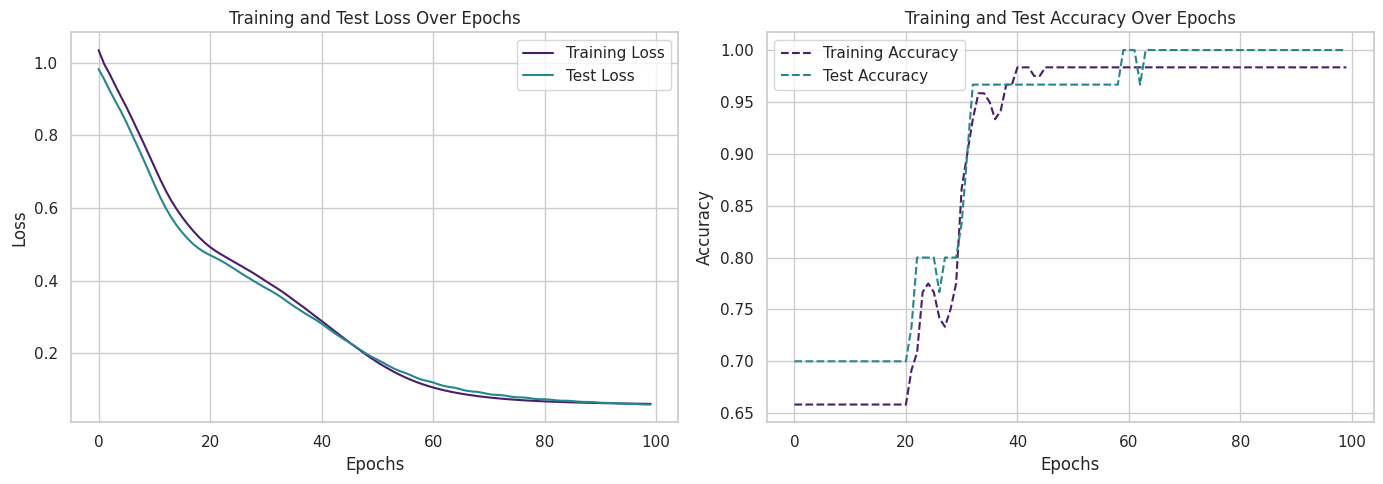

In [12]:
test_loss(model, X_train, y_train, X_test, y_test, opt, loss_functions[0])

### **(2) BCE With Logits Loss Function**

KLDivLoss()
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQUI
ENTRA AQU

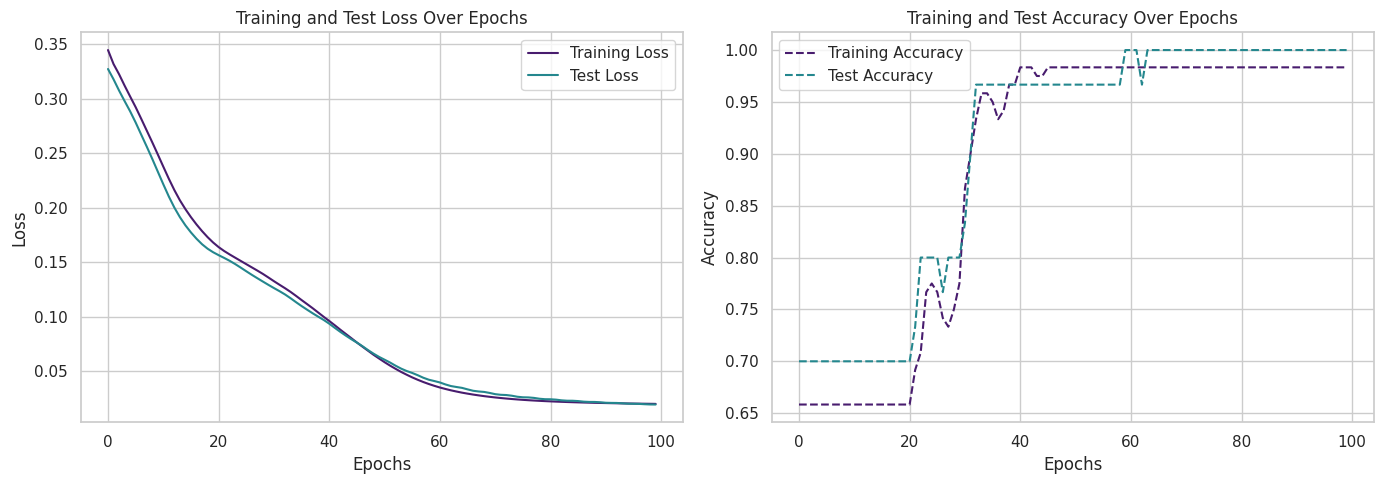

In [12]:
test_loss(model, X_train, y_train, X_test, y_test, opt, loss_functions[1])

### **(3) KL Divergence Loss Function**

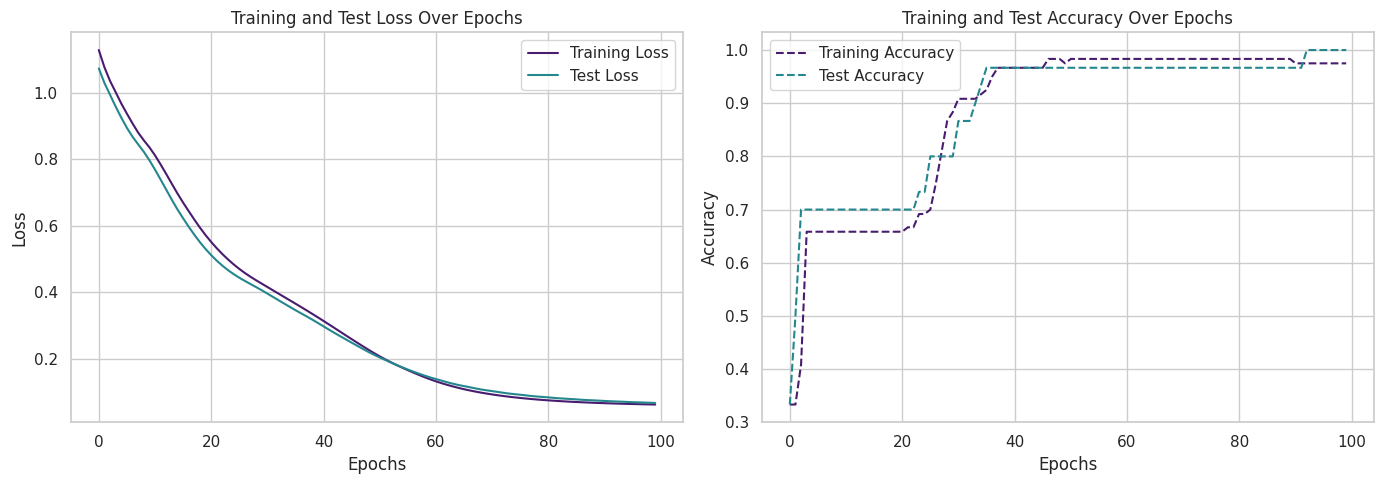

In [17]:
test_loss(model, X_train, y_train, X_test, y_test, opt, loss_functions[2])

## **(5) Testing Different Regularization Techniques**